<div style="background-color:#9dedde; padding: 20px">
<h2>Projet 7 : Implémentez un modèle de Scoring</h2>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly import tools
import plotly.express as px
from datetime import datetime
import datetime

# pd.set_option('display.max_columns', 200)
# pd.set_option('display.max_rows', 1000)

<div style="background-color:#d699f2; padding: 10px">
    <h2>
        <b>Chargement des données</b>
    </h2>
</div>


In [2]:
df = pd.read_csv("app_train_sample_clean.csv")

In [3]:
df.shape

(30751, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30751 entries, 0 to 30750
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   TYPE_CONTRAT            30751 non-null  object 
 1   AGE                     30751 non-null  int64  
 2   ID_CLIENT               30751 non-null  int64  
 3   CIBLE                   30751 non-null  int64  
 4   STATUT_FAMILIAL         30751 non-null  object 
 5   YEARS_EMPLOYED          30751 non-null  int64  
 6   TOTAL_CREDIT            30751 non-null  float64
 7   REMB_MENSUEL            30751 non-null  float64
 8   PROPRIETAIRE_BIEN_IMMO  30751 non-null  object 
 9   CNT_FAM_MEMBERS         30751 non-null  float64
 10  TYPE_REVENUS            30751 non-null  object 
 11  GENRE                   30751 non-null  object 
 12  MONTANT_PRIX_BIENS      30727 non-null  float64
 13  NIVEAU_EDUCATION        30751 non-null  object 
 14  REVENU_TOTAL            30751 non-null

In [5]:
df.dtypes

TYPE_CONTRAT               object
AGE                         int64
ID_CLIENT                   int64
CIBLE                       int64
STATUT_FAMILIAL            object
YEARS_EMPLOYED              int64
TOTAL_CREDIT              float64
REMB_MENSUEL              float64
PROPRIETAIRE_BIEN_IMMO     object
CNT_FAM_MEMBERS           float64
TYPE_REVENUS               object
GENRE                      object
MONTANT_PRIX_BIENS        float64
NIVEAU_EDUCATION           object
REVENU_TOTAL              float64
SOURCE_EXTERNE_2          float64
SOURCE_EXTERNE_3          float64
PROPRIETAIRE_VOITURE       object
dtype: object

In [6]:
df.tail()

,TYPE_CONTRAT,AGE,ID_CLIENT,CIBLE,STATUT_FAMILIAL,YEARS_EMPLOYED,TOTAL_CREDIT,REMB_MENSUEL,PROPRIETAIRE_BIEN_IMMO,CNT_FAM_MEMBERS,TYPE_REVENUS,GENRE,MONTANT_PRIX_BIENS,NIVEAU_EDUCATION,REVENU_TOTAL,SOURCE_EXTERNE_2,SOURCE_EXTERNE_3,PROPRIETAIRE_VOITURE
30746,Cash loans,41,311641,0,Married,3,808650.0,23773.5,N,3.0,State servant,F,675000.0,Secondary / secondary special,90000.0,0.621768,0.759712,N
30747,Cash loans,38,151728,1,Single / not married,20,85500.0,9108.0,Y,1.0,Working,M,85500.0,Secondary / secondary special,40500.0,0.393861,NaN,N
30748,Revolving loans,44,384640,0,Married,-1000,247500.0,12375.0,Y,2.0,Pensioner,F,247500.0,Higher education,69750.0,0.673987,NaN,Y
30749,Cash loans,60,437079,0,Widow,-1000,270000.0,9828.0,Y,1.0,Pensioner,F,270000.0,Secondary / secondary special,36000.0,0.546689,NaN,N
30750,Cash loans,59,389739,0,Widow,3,1288350.0,37053.0,Y,1.0,Working,F,1125000.0,Secondary / secondary special,148500.0,0.670388,0.157595,Y


In [7]:
df.head()

,TYPE_CONTRAT,AGE,ID_CLIENT,CIBLE,STATUT_FAMILIAL,YEARS_EMPLOYED,TOTAL_CREDIT,REMB_MENSUEL,PROPRIETAIRE_BIEN_IMMO,CNT_FAM_MEMBERS,TYPE_REVENUS,GENRE,MONTANT_PRIX_BIENS,NIVEAU_EDUCATION,REVENU_TOTAL,SOURCE_EXTERNE_2,SOURCE_EXTERNE_3,PROPRIETAIRE_VOITURE
0,Cash loans,48,196888,0,Married,0,1350000.0,39604.5,Y,2.0,Working,F,1350000.0,Higher education,135000.0,0.761443,0.757069,N
1,Cash loans,55,101392,0,Civil marriage,2,573628.5,24435.0,Y,2.0,Working,F,463500.0,Higher education,81000.0,0.396825,0.818248,Y
2,Cash loans,25,435135,0,Single / not married,2,298512.0,19948.5,N,1.0,Working,F,270000.0,Higher education,112500.0,0.385353,NaN,N
3,Cash loans,30,396314,0,Married,5,218016.0,17352.0,N,2.0,Working,M,180000.0,Higher education,81000.0,0.545649,0.336062,N
4,Cash loans,44,341153,1,Married,0,1006920.0,42790.5,Y,2.0,Working,F,900000.0,Secondary / secondary special,90000.0,0.444443,0.673830,N


<div style="background-color:#d699f2; padding: 10px">
    <h2>
        <b> Analyse Exploratoire ---- Features numériques</b>
    </h2>
</div>


In [8]:
numeric_columns = df.select_dtypes(include=np.number)

<Axes: >

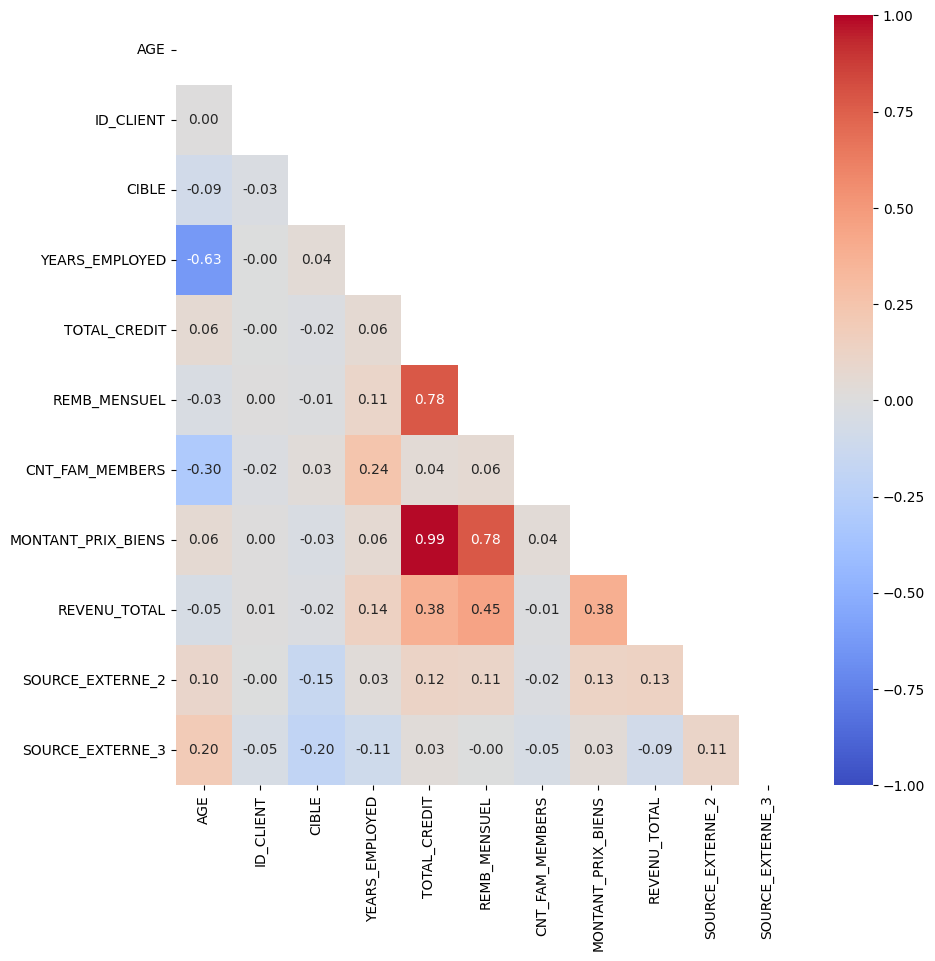

In [9]:
fig = plt.subplots(1, 1, figsize=(10, 10))
corr = numeric_columns.sample(frac=0.1).corr()
mask = np.triu(corr)
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1, mask=mask, fmt=".2f")

In [10]:
df.CIBLE.value_counts()

CIBLE
0    28280
1     2471
Name: count, dtype: int64

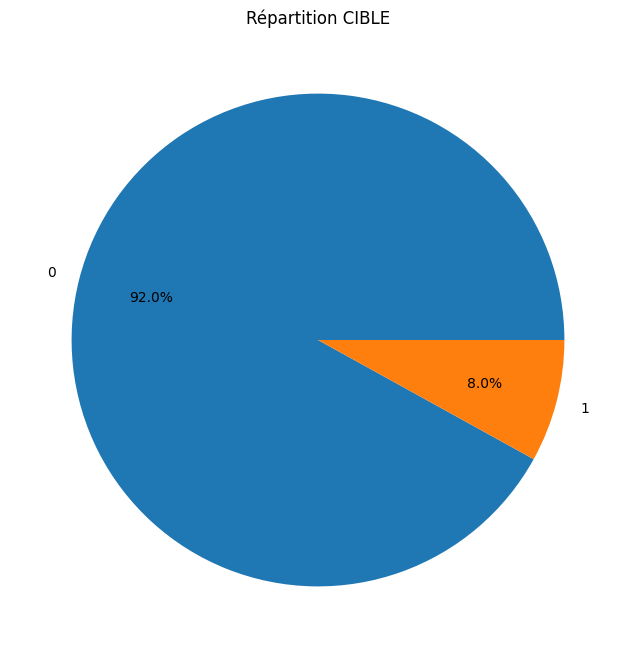

In [11]:
note_pie = df["CIBLE"].value_counts()

plt.figure(figsize=(12, 8))
plt.pie(note_pie, labels=note_pie.index, autopct="%1.1f%%", pctdistance=0.7)
plt.title("Répartition CIBLE")
plt.show()

<div style="background-color:#a2f5aa; padding: 1px; max-width: 350px;">
    <h2>
        <b> Relation Cible x Age</b>
    </h2>
</div>


C:\Users\acer6\AppData\Local\Temp\ipykernel_22972\2408682498.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



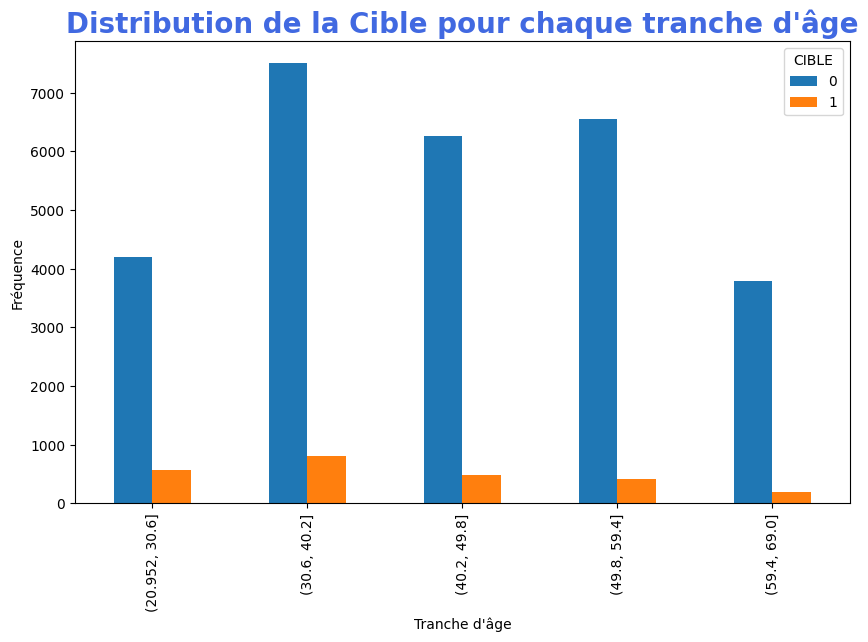

In [12]:
age_group_cible = df.groupby([pd.cut(df["AGE"], bins=5), "CIBLE"]).size().unstack()

age_group_cible.plot(kind="bar", stacked=False, figsize=(10, 6))
plt.xlabel("Tranche d'âge")
plt.ylabel("Fréquence")
plt.title(
    "Distribution de la Cible pour chaque tranche d'âge",
    fontsize=20,
    fontweight="bold",
    color="RoyalBlue",
)
plt.legend(title="CIBLE", labels=["0", "1"])
plt.show()

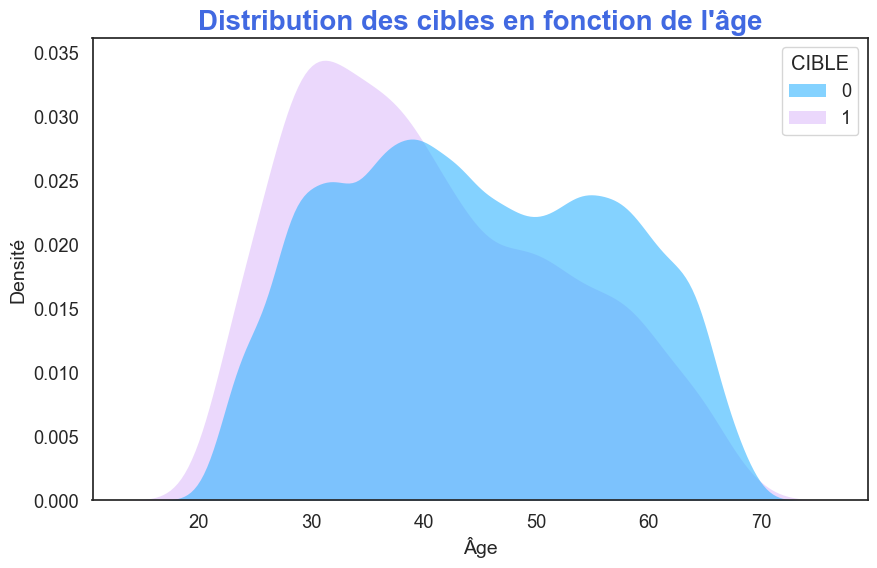

In [13]:
custom_colors = ["#33b4ff", "#debefa"]  # Définir des couleurs personnalisées


sns.set(style="white", palette=custom_colors, font_scale=1.2)


plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=df, x="AGE", hue="CIBLE", fill=True, common_norm=False, alpha=0.6, linewidth=0
)
plt.xlabel("Âge", fontsize=14)
plt.ylabel("Densité", fontsize=14)
plt.title(
    "Distribution des cibles en fonction de l'âge",
    fontsize=20,
    fontweight="bold",
    color="RoyalBlue",
)
plt.grid(False)  # Retirer la grille
plt.show()

<div style="background-color:#a2f5aa; padding: 1px; max-width: 600px;">
    <h2>
        <b> Relation Cible x Nombre membre de la famille</b>
    </h2>
</div>


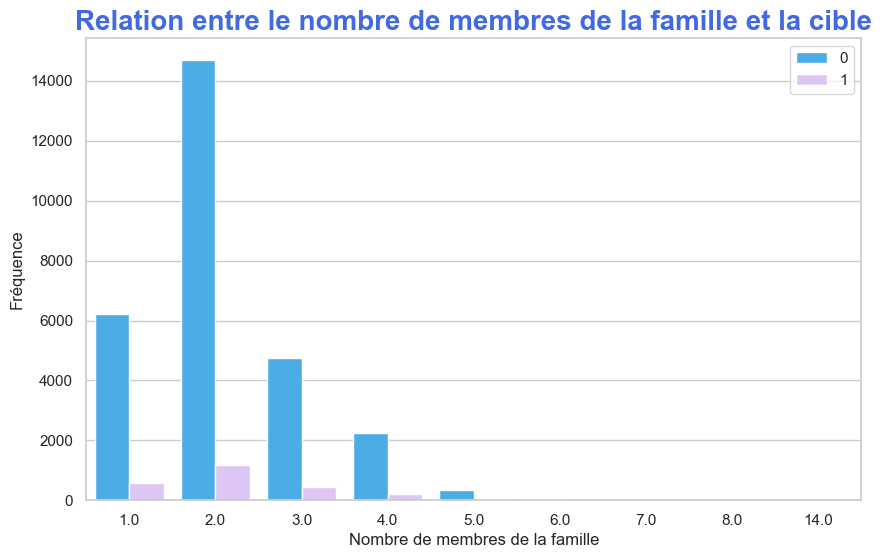

In [14]:
# Définition de la palette de couleurs personnalisée
custom_palette = ["#33b4ff", "#debefa"]

# Paramètres de style pour personnaliser le graphique
sns.set(style="whitegrid")

# Tracer le graphique catégoriel
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="CNT_FAM_MEMBERS", hue="CIBLE", data=df, palette=custom_palette)

# Ajouter des titres et des étiquettes
plt.xlabel("Nombre de membres de la famille")
plt.ylabel("Fréquence")
plt.title(
    "Relation entre le nombre de membres de la famille et la cible",
    fontsize=20,
    fontweight="bold",
    color="RoyalBlue",
)
plt.legend(loc="upper right")
# Afficher le graphique
plt.show()

<div style="background-color:#a2f5aa; padding: 1px; max-width: 350px;">
    <h2>
        <b> Relation Cible x Total Credit</b>
    </h2>
</div>


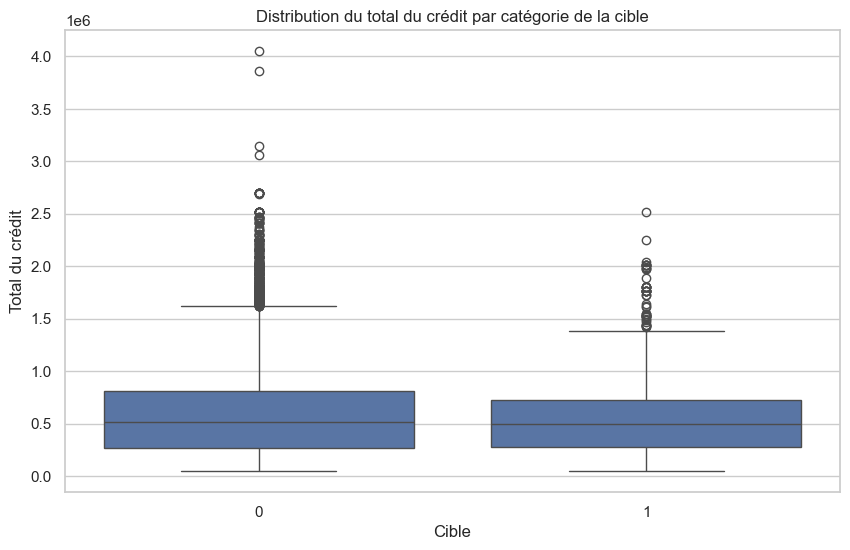

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="CIBLE", y="TOTAL_CREDIT", data=df)
plt.title("Distribution du total du crédit par catégorie de la cible")
plt.xlabel("Cible")
plt.ylabel("Total du crédit")
plt.show()

In [16]:
df["TOTAL_CREDIT"].describe().T

count    3.075100e+04
mean     5.976381e+05
std      3.998446e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: TOTAL_CREDIT, dtype: float64

In [17]:
df.columns.tolist()

['TYPE_CONTRAT',
 'AGE',
 'ID_CLIENT',
 'CIBLE',
 'STATUT_FAMILIAL',
 'YEARS_EMPLOYED',
 'TOTAL_CREDIT',
 'REMB_MENSUEL',
 'PROPRIETAIRE_BIEN_IMMO',
 'CNT_FAM_MEMBERS',
 'TYPE_REVENUS',
 'GENRE',
 'MONTANT_PRIX_BIENS',
 'NIVEAU_EDUCATION',
 'REVENU_TOTAL',
 'SOURCE_EXTERNE_2',
 'SOURCE_EXTERNE_3',
 'PROPRIETAIRE_VOITURE']

<div style="background-color:#d699f2; padding: 10px">
    <h2>
        <b> Analyse Exploratoire ---- Features catégorielles</b>
    </h2>
</div>


<div style="background-color:#a2f5aa; padding: 1px; max-width: 350px;">
    <h2>
        <b> Relation Cible x Biens immo</b>
    </h2>
</div>


C:\Users\acer6\AppData\Local\Temp\ipykernel_22972\2802182120.py:5: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




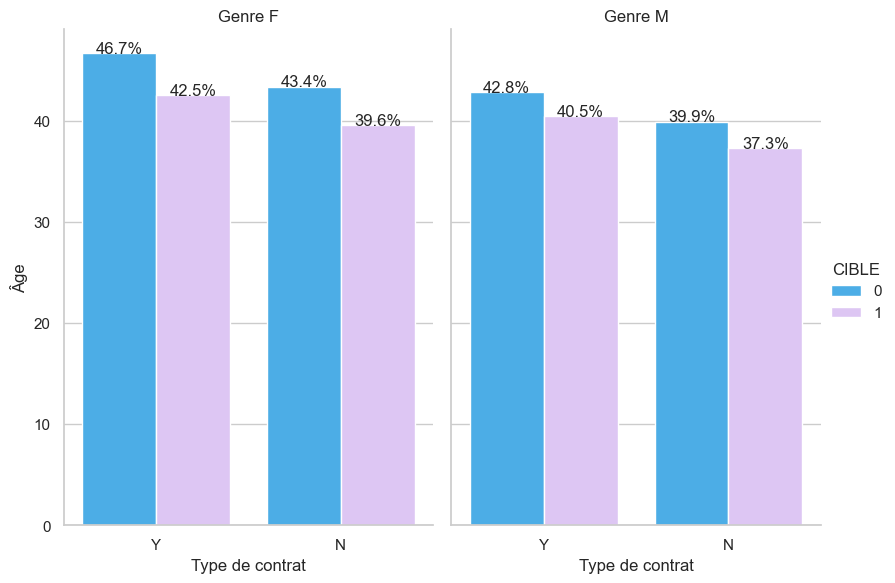

In [18]:
custom_palette = ["#33b4ff", "#debefa"]

sns.set(style="whitegrid")

g = sns.catplot(
    x="PROPRIETAIRE_BIEN_IMMO",
    y="AGE",
    hue="CIBLE",
    col="GENRE",
    data=df,
    kind="bar",
    ci=None,
    palette=custom_palette,
    height=6,
    aspect=0.7,
)

g.set_axis_labels("Type de contrat", "Âge")
g.set_titles("Genre {col_name}")

for ax in g.axes.flat:
    for p in ax.patches:
        if p.get_height() > 0:
            height = p.get_height()
            ax.text(
                p.get_x() + p.get_width() / 2.0,
                height,
                "{:.1f}%".format(height),
                ha="center",
            )

plt.show()

<div style="background-color:#a2f5aa; padding: 1px; max-width: 300px;">
    <h2>
        <b>Relation Cible x Voiture</b>
    </h2>
</div>


C:\Users\acer6\AppData\Local\Temp\ipykernel_22972\2611014336.py:5: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




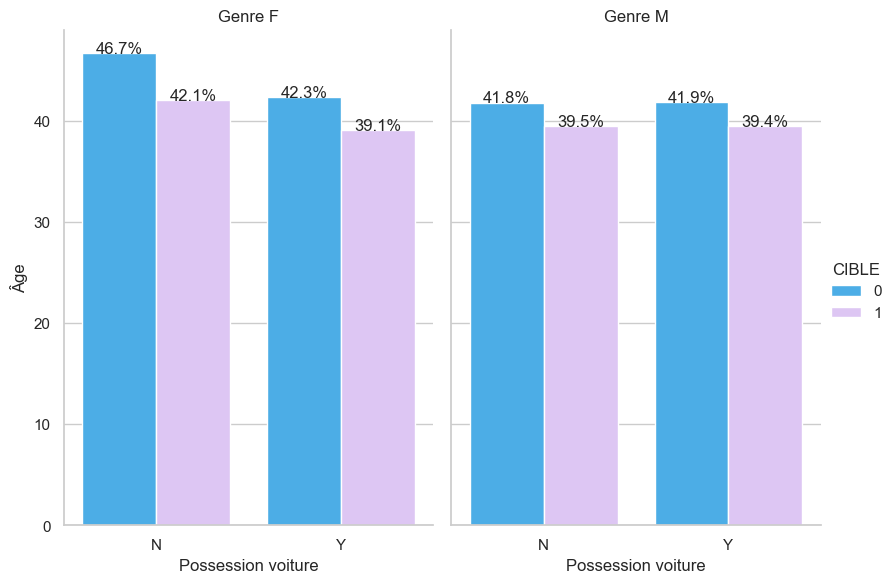

In [19]:
custom_palette = ["#33b4ff", "#debefa"]

sns.set(style="whitegrid")

g = sns.catplot(
    x="PROPRIETAIRE_VOITURE",
    y="AGE",
    hue="CIBLE",
    col="GENRE",
    data=df,
    kind="bar",
    ci=None,
    palette=custom_palette,
    height=6,
    aspect=0.7,
)

g.set_axis_labels("Possession voiture", "Âge")
g.set_titles("Genre {col_name}")

for ax in g.axes.flat:
    for p in ax.patches:
        if p.get_height() > 0:
            height = p.get_height()
            ax.text(
                p.get_x() + p.get_width() / 2.0,
                height,
                "{:.1f}%".format(height),
                ha="center",
            )

plt.show()

<div style="background-color:#a2f5aa; padding: 1px; max-width: 500px;">
    <h2>
        <b>Relation Cible x Type de Contrat x Genre</b>
    </h2>
</div>


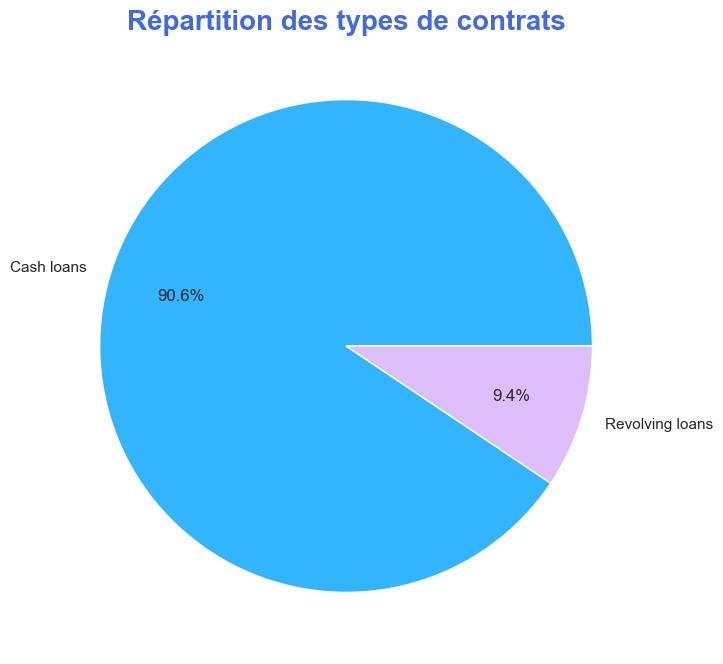

In [20]:
custom_palette = ["#33b4ff", "#debefa"]
note_pie = df["TYPE_CONTRAT"].value_counts()

plt.figure(figsize=(12, 8))
plt.pie(
    note_pie,
    labels=note_pie.index,
    colors=custom_palette,
    autopct="%1.1f%%",
    pctdistance=0.7,
)
plt.title(
    "Répartition des types de contrats",
    fontsize=20,
    fontweight="bold",
    color="RoyalBlue",
)
plt.show()

C:\Users\acer6\AppData\Local\Temp\ipykernel_22972\3226085150.py:5: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




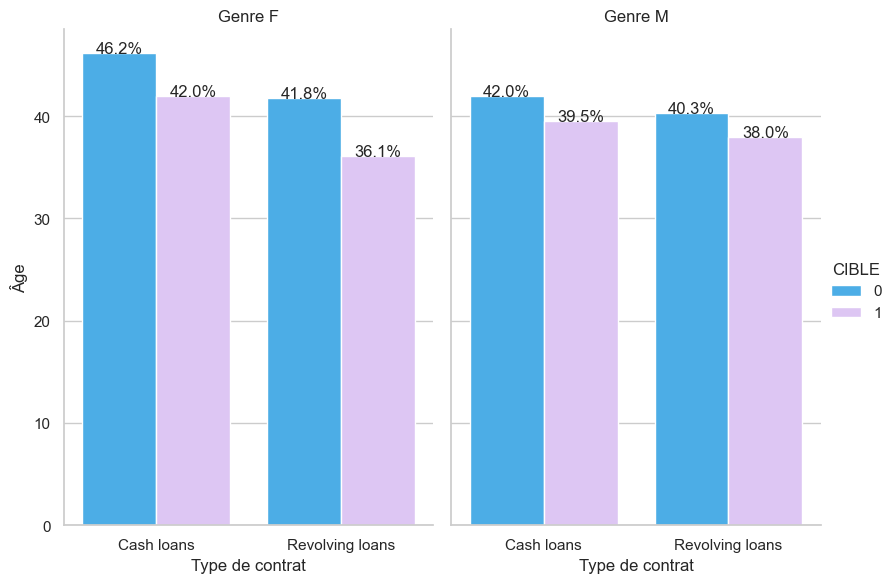

In [21]:
custom_palette = ["#33b4ff", "#debefa"]

sns.set(style="whitegrid")

g = sns.catplot(
    x="TYPE_CONTRAT",
    y="AGE",
    hue="CIBLE",
    col="GENRE",
    data=df,
    kind="bar",
    ci=None,
    palette=custom_palette,
    height=6,
    aspect=0.7,
)

g.set_axis_labels("Type de contrat", "Âge")
g.set_titles("Genre {col_name}")

for ax in g.axes.flat:
    for p in ax.patches:
        if p.get_height() > 0:
            height = p.get_height()
            ax.text(
                p.get_x() + p.get_width() / 2.0,
                height,
                "{:.1f}%".format(height),
                ha="center",
            )

plt.show()

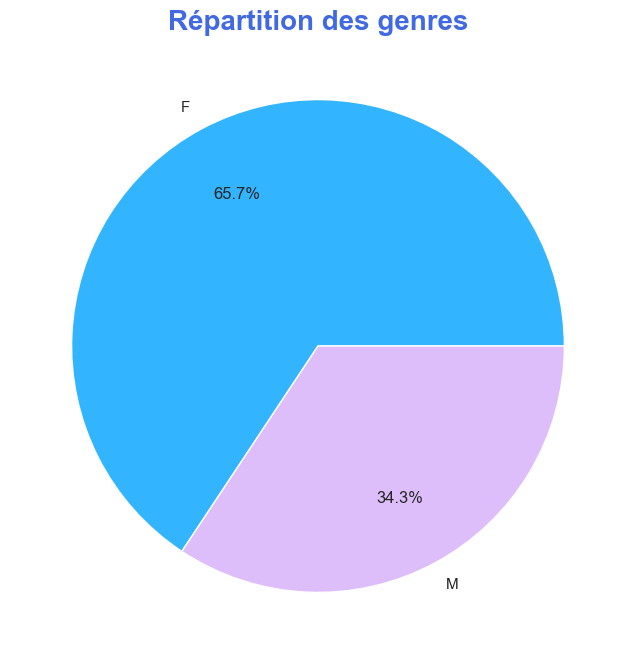

In [22]:
custom_palette = ["#33b4ff", "#debefa"]
note_pie = df["GENRE"].value_counts()

plt.figure(figsize=(12, 8))
plt.pie(
    note_pie,
    labels=note_pie.index,
    colors=custom_palette,
    autopct="%1.1f%%",
    pctdistance=0.7,
)
plt.title("Répartition des genres", fontsize=20, fontweight="bold", color="RoyalBlue")
plt.show()

In [23]:
df["GENRE"].value_counts()

GENRE
F    20198
M    10553
Name: count, dtype: int64

In [24]:
df = df[df["GENRE"] != "XNA"]

<Figure size 1000x1000 with 0 Axes>

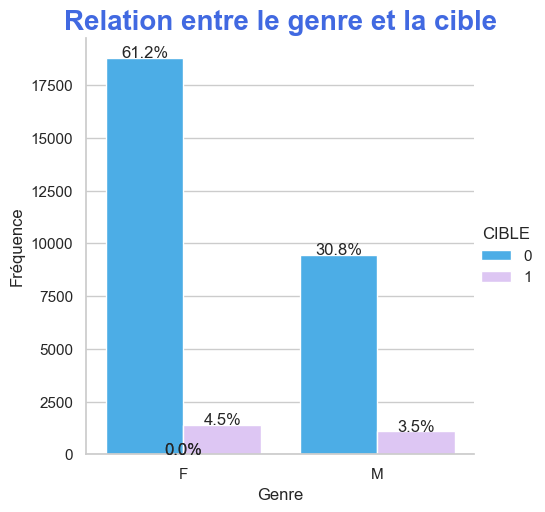

In [25]:
# Définition de la palette de couleurs personnalisée
custom_palette = ["#33b4ff", "#debefa"]

# Paramètres de style pour personnaliser le graphique
sns.set(style="whitegrid")
plt.figure(figsize=(10, 10))

# Tracer le graphique catégoriel
ax = sns.catplot(x="GENRE", hue="CIBLE", data=df, kind="count", palette=custom_palette)

total = float(len(df))
for p in ax.ax.patches:
    height = p.get_height()
    ax.ax.text(
        p.get_x() + p.get_width() / 2.0,
        height + 3,
        "{:.1f}%".format((height / total) * 100),
        ha="center",
    )

# Ajouter des titres et des étiquettes
plt.xlabel("Genre")
plt.ylabel("Fréquence")
plt.title(
    "Relation entre le genre et la cible",
    fontsize=20,
    fontweight="bold",
    color="RoyalBlue",
)


# Afficher le graphique
plt.show()

<div style="background-color:#a2f5aa; padding: 1px; max-width: 800px;">
    <h2>
        <b>Relation Cible x Satut familial</b>
    </h2>
</div>


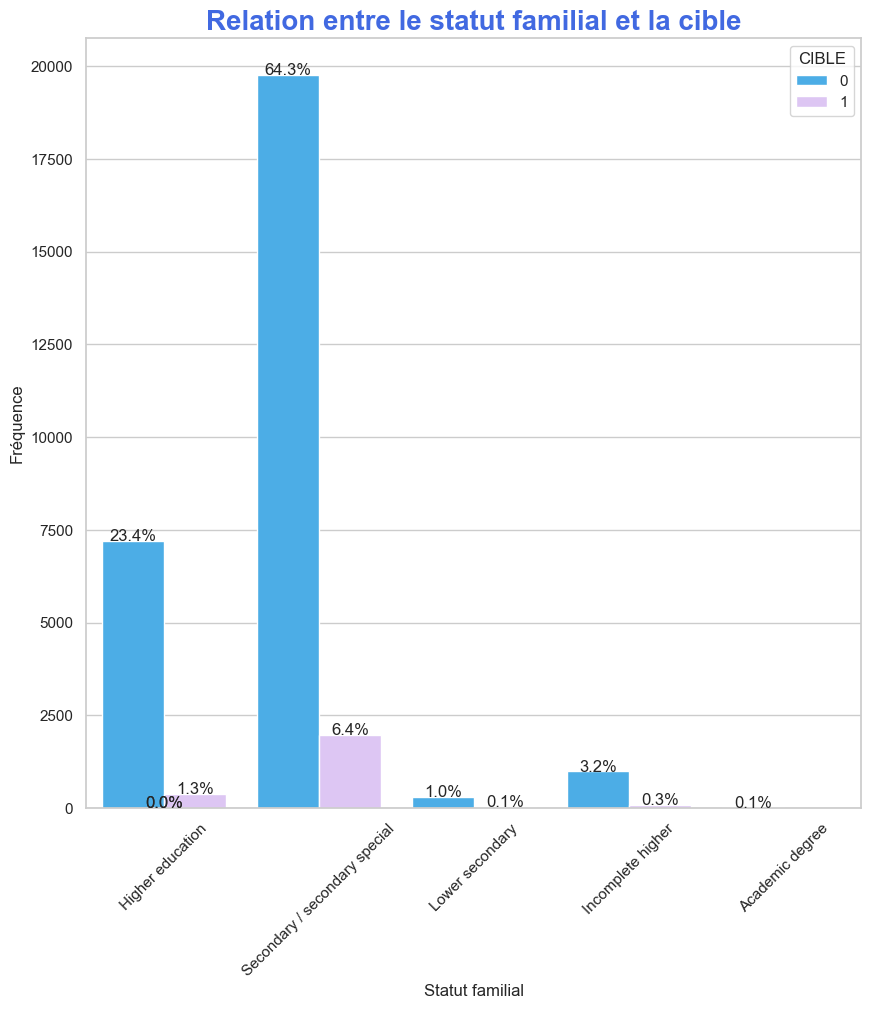

In [26]:
# Définition de la palette de couleurs personnalisée
custom_palette = ["#33b4ff", "#debefa"]

# Paramètres de style pour personnaliser le graphique
sns.set(style="whitegrid")

# Tracer le graphique catégoriel
plt.figure(figsize=(10, 10))
ax = sns.countplot(x="NIVEAU_EDUCATION", hue="CIBLE", data=df, palette=custom_palette)

total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.0,
        height + 3,
        "{:.1f}%".format((height / total) * 100),
        ha="center",
    )

# Ajouter des titres et des étiquettes
plt.xlabel("Statut familial")
plt.ylabel("Fréquence")
plt.title(
    "Relation entre le statut familial et la cible",
    fontsize=20,
    fontweight="bold",
    color="RoyalBlue",
)
plt.xticks(rotation=45)
# Afficher le graphique
plt.show()

<div style="background-color:#a2f5aa; padding: 1px; max-width: 800px;">
    <h2>
        <b>Relation Cible x Type de revenus</b>
    </h2>
</div>


In [27]:
df["TYPE_REVENUS"].value_counts()

TYPE_REVENUS
Working                 15960
Commercial associate     7028
Pensioner                5599
State servant            2157
Unemployed                  6
Maternity leave             1
Name: count, dtype: int64

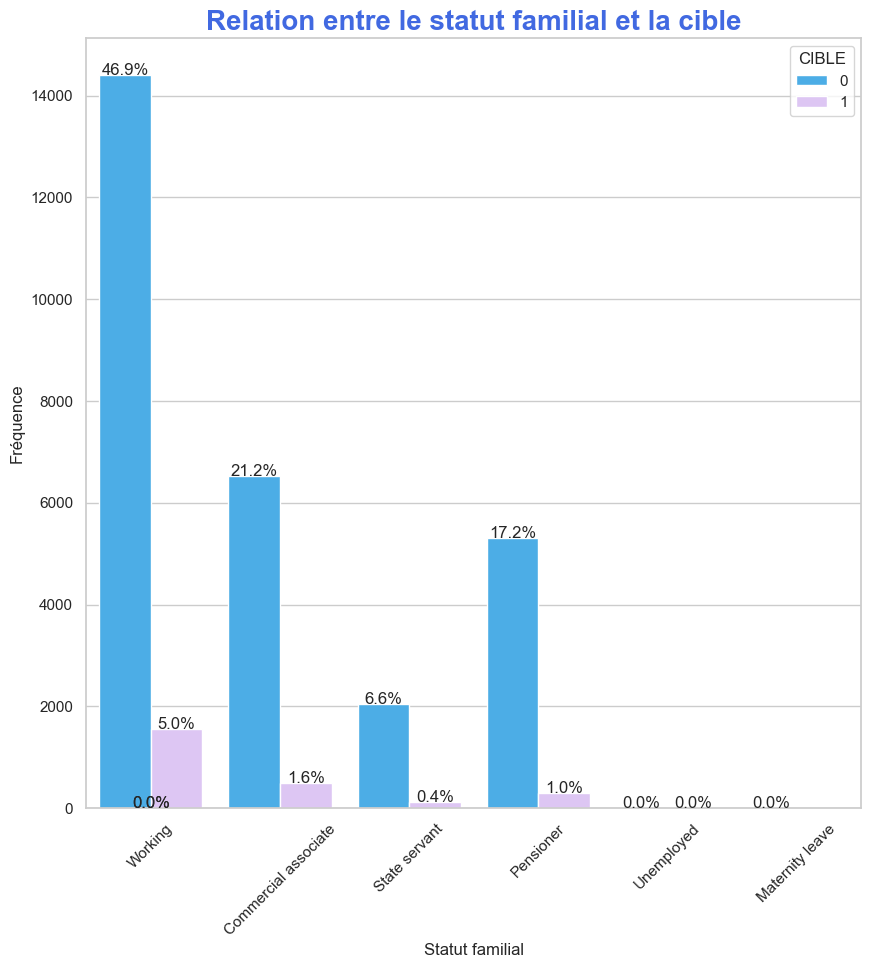

In [28]:
# Définition de la palette de couleurs personnalisée
custom_palette = ["#33b4ff", "#debefa"]

# Paramètres de style pour personnaliser le graphique
sns.set(style="whitegrid")

# Tracer le graphique catégoriel
plt.figure(figsize=(10, 10))
ax = sns.countplot(x="TYPE_REVENUS", hue="CIBLE", data=df, palette=custom_palette)

total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.0,
        height + 3,
        "{:.1f}%".format((height / total) * 100),
        ha="center",
    )

# Ajouter des titres et des étiquettes
plt.xlabel("Statut familial")
plt.ylabel("Fréquence")
plt.title(
    "Relation entre le statut familial et la cible",
    fontsize=20,
    fontweight="bold",
    color="RoyalBlue",
)
plt.xticks(rotation=45)
# Afficher le graphique
plt.show()

In [29]:
df.columns.tolist()

['TYPE_CONTRAT',
 'AGE',
 'ID_CLIENT',
 'CIBLE',
 'STATUT_FAMILIAL',
 'YEARS_EMPLOYED',
 'TOTAL_CREDIT',
 'REMB_MENSUEL',
 'PROPRIETAIRE_BIEN_IMMO',
 'CNT_FAM_MEMBERS',
 'TYPE_REVENUS',
 'GENRE',
 'MONTANT_PRIX_BIENS',
 'NIVEAU_EDUCATION',
 'REVENU_TOTAL',
 'SOURCE_EXTERNE_2',
 'SOURCE_EXTERNE_3',
 'PROPRIETAIRE_VOITURE']

<div style="background-color:#d699f2; padding: 10px">
    <h2>
        <b> Export & Save</b>
    </h2>
</div>


In [30]:
df.to_csv("app_train_sample_clean.csv", index=False)

In [31]:
df

,TYPE_CONTRAT,AGE,ID_CLIENT,CIBLE,STATUT_FAMILIAL,YEARS_EMPLOYED,TOTAL_CREDIT,REMB_MENSUEL,PROPRIETAIRE_BIEN_IMMO,CNT_FAM_MEMBERS,TYPE_REVENUS,GENRE,MONTANT_PRIX_BIENS,NIVEAU_EDUCATION,REVENU_TOTAL,SOURCE_EXTERNE_2,SOURCE_EXTERNE_3,PROPRIETAIRE_VOITURE
0,Cash loans,48,196888,0,Married,0,1350000.0,39604.5,Y,2.0,Working,F,1350000.0,Higher education,135000.0,0.761443,0.757069,N
1,Cash loans,55,101392,0,Civil marriage,2,573628.5,24435.0,Y,2.0,Working,F,463500.0,Higher education,81000.0,0.396825,0.818248,Y
2,Cash loans,25,435135,0,Single / not married,2,298512.0,19948.5,N,1.0,Working,F,270000.0,Higher education,112500.0,0.385353,NaN,N
3,Cash loans,30,396314,0,Married,5,218016.0,17352.0,N,2.0,Working,M,180000.0,Higher education,81000.0,0.545649,0.336062,N
4,Cash loans,44,341153,1,Married,0,1006920.0,42790.5,Y,2.0,Working,F,900000.0,Secondary / secondary special,90000.0,0.444443,0.673830,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30746,Cash loans,41,311641,0,Married,3,808650.0,23773.5,N,3.0,State servant,F,675000.0,Secondary / secondary special,90000.0,0.621768,0.759712,N
30747,Cash loans,38,151728,1,Single / not married,20,85500.0,9108.0,Y,1.0,Working,M,85500.0,Secondary / secondary special,40500.0,0.393861,NaN,N
30748,Revolving loans,44,384640,0,Married,-1000,247500.0,12375.0,Y,2.0,Pensioner,F,247500.0,Higher education,69750.0,0.673987,NaN,Y
30749,Cash loans,60,437079,0,Widow,-1000,270000.0,9828.0,Y,1.0,Pensioner,F,270000.0,Secondary / secondary special,36000.0,0.546689,NaN,N


Analyse bivariée en fonction de la cible
discribe(round.2) a chaque graph
+ distribution 
Conserver soit age soit date de naissance
regarder val aberrantes